### Importa los datos
Dataset con diferentes fármacos, sus efectos y ratings de los clientes.

Importa el dataset *drugLibTrain_raw.tsv*

In [1]:
import matplotlib.pyplot as plt
import seaborn as  sns
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv('data/drugLibTrain_raw.tsv', sep='\t', index_col=0)
df.head()

,urlDrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview
2202,enalapril,4,Highly Effective,Mild Side Effects,management of congestive heart failure,slowed the progression of left ventricular dys...,"cough, hypotension , proteinuria, impotence , ...","monitor blood pressure , weight and asses for ..."
3117,ortho-tri-cyclen,1,Highly Effective,Severe Side Effects,birth prevention,Although this type of birth control has more c...,"Heavy Cycle, Cramps, Hot Flashes, Fatigue, Lon...","I Hate This Birth Control, I Would Not Suggest..."
1146,ponstel,10,Highly Effective,No Side Effects,menstrual cramps,I was used to having cramps so badly that they...,Heavier bleeding and clotting than normal.,I took 2 pills at the onset of my menstrual cr...
3947,prilosec,3,Marginally Effective,Mild Side Effects,acid reflux,The acid reflux went away for a few months aft...,"Constipation, dry mouth and some mild dizzines...",I was given Prilosec prescription at a dose of...
1951,lyrica,2,Marginally Effective,Severe Side Effects,fibromyalgia,I think that the Lyrica was starting to help w...,I felt extremely drugged and dopey. Could not...,See above


### Descriptive Analysis

Quedate únicamente con las columnas que podamos manejar: Columnas numéricas y columnas categoricas con pocas categorias (menos de 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3107 entries, 2202 to 2748
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   urlDrugName        3107 non-null   object
 1   rating             3107 non-null   int64 
 2   effectiveness      3107 non-null   object
 3   sideEffects        3107 non-null   object
 4   condition          3106 non-null   object
 5   benefitsReview     3107 non-null   object
 6   sideEffectsReview  3105 non-null   object
 7   commentsReview     3099 non-null   object
dtypes: int64(1), object(7)
memory usage: 218.5+ KB


In [7]:
df.describe(include='all')

,urlDrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview
count,3107,3107.000000,3107,3107,3106,3107,3105,3099
unique,502,NaN,5,5,1426,3032,2814,3047
top,lexapro,NaN,Highly Effective,Mild Side Effects,depression,none,none,none
freq,63,NaN,1330,1019,236,20,112,6
mean,NaN,7.006115,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,2.937582,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,5.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,8.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,NaN


#### Transforma las columnas categoricas

Transforma las columnas categoricas a numericas mediante dummies

In [8]:
df['effectiveness'].unique()

array(['Highly Effective', 'Marginally Effective', 'Ineffective',
       'Considerably Effective', 'Moderately Effective'], dtype=object)

In [9]:
df['sideEffects'].unique()

array(['Mild Side Effects', 'Severe Side Effects', 'No Side Effects',
       'Extremely Severe Side Effects', 'Moderate Side Effects'],
      dtype=object)

In [11]:
pd.get_dummies(df[['effectiveness','sideEffects']])

,effectiveness_Considerably Effective,effectiveness_Highly Effective,effectiveness_Ineffective,effectiveness_Marginally Effective,effectiveness_Moderately Effective,sideEffects_Extremely Severe Side Effects,sideEffects_Mild Side Effects,sideEffects_Moderate Side Effects,sideEffects_No Side Effects,sideEffects_Severe Side Effects
2202,0,1,0,0,0,0,1,0,0,0
3117,0,1,0,0,0,0,0,0,0,1
1146,0,1,0,0,0,0,0,0,1,0
3947,0,0,0,1,0,0,1,0,0,0
1951,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
1039,0,1,0,0,0,0,1,0,0,0
3281,0,0,1,0,0,1,0,0,0,0
1664,0,0,0,1,0,0,0,1,0,0
2621,1,0,0,0,0,0,1,0,0,0


In [13]:
my_dict = {'Ineffective':0,
           'Marginally Effective':1,
           'Moderately Effective':2,
           'Considerably Effective':3,
           'Highly Effective':4}
df['effectiveness_int'] = df['effectiveness'].map(my_dict)
df.head()

,urlDrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview,effectiveness_int
2202,enalapril,4,Highly Effective,Mild Side Effects,management of congestive heart failure,slowed the progression of left ventricular dys...,"cough, hypotension , proteinuria, impotence , ...","monitor blood pressure , weight and asses for ...",4
3117,ortho-tri-cyclen,1,Highly Effective,Severe Side Effects,birth prevention,Although this type of birth control has more c...,"Heavy Cycle, Cramps, Hot Flashes, Fatigue, Lon...","I Hate This Birth Control, I Would Not Suggest...",4
1146,ponstel,10,Highly Effective,No Side Effects,menstrual cramps,I was used to having cramps so badly that they...,Heavier bleeding and clotting than normal.,I took 2 pills at the onset of my menstrual cr...,4
3947,prilosec,3,Marginally Effective,Mild Side Effects,acid reflux,The acid reflux went away for a few months aft...,"Constipation, dry mouth and some mild dizzines...",I was given Prilosec prescription at a dose of...,1
1951,lyrica,2,Marginally Effective,Severe Side Effects,fibromyalgia,I think that the Lyrica was starting to help w...,I felt extremely drugged and dopey. Could not...,See above,1


In [14]:
my_dict = {'No Side Effects':0,
           'Mild Side Effects':1,
           'Moderate Side Effects':2,
           'Severe Side Effects':3,
           'Extremely Severe Side Effects':4}
df['sideEffects_int'] = df['sideEffects'].map(my_dict)
df.head()

,urlDrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview,effectiveness_int,sideEffects_int
2202,enalapril,4,Highly Effective,Mild Side Effects,management of congestive heart failure,slowed the progression of left ventricular dys...,"cough, hypotension , proteinuria, impotence , ...","monitor blood pressure , weight and asses for ...",4,1
3117,ortho-tri-cyclen,1,Highly Effective,Severe Side Effects,birth prevention,Although this type of birth control has more c...,"Heavy Cycle, Cramps, Hot Flashes, Fatigue, Lon...","I Hate This Birth Control, I Would Not Suggest...",4,3
1146,ponstel,10,Highly Effective,No Side Effects,menstrual cramps,I was used to having cramps so badly that they...,Heavier bleeding and clotting than normal.,I took 2 pills at the onset of my menstrual cr...,4,0
3947,prilosec,3,Marginally Effective,Mild Side Effects,acid reflux,The acid reflux went away for a few months aft...,"Constipation, dry mouth and some mild dizzines...",I was given Prilosec prescription at a dose of...,1,1
1951,lyrica,2,Marginally Effective,Severe Side Effects,fibromyalgia,I think that the Lyrica was starting to help w...,I felt extremely drugged and dopey. Could not...,See above,1,3


In [15]:
df_model = df[['rating','effectiveness_int', 'sideEffects_int']]
df_model.head()

,rating,effectiveness_int,sideEffects_int
2202,4,4,1
3117,1,4,3
1146,10,4,0
3947,3,1,1
1951,2,1,3


#### Evalua cual es la mejor K

Utiliza silhouette_score para evaluar cual es la mejor K.

#### Genera el K Means 

In [16]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

In [17]:
km_perk = [KMeans(n_clusters=k, random_state=42).fit(df_model) for k in range(1,20)]

In [18]:
km_perk

[KMeans(n_clusters=1, random_state=42),
 KMeans(n_clusters=2, random_state=42),
 KMeans(n_clusters=3, random_state=42),
 KMeans(n_clusters=4, random_state=42),
 KMeans(n_clusters=5, random_state=42),
 KMeans(n_clusters=6, random_state=42),
 KMeans(n_clusters=7, random_state=42),
 KMeans(random_state=42),
 KMeans(n_clusters=9, random_state=42),
 KMeans(n_clusters=10, random_state=42),
 KMeans(n_clusters=11, random_state=42),
 KMeans(n_clusters=12, random_state=42),
 KMeans(n_clusters=13, random_state=42),
 KMeans(n_clusters=14, random_state=42),
 KMeans(n_clusters=15, random_state=42),
 KMeans(n_clusters=16, random_state=42),
 KMeans(n_clusters=17, random_state=42),
 KMeans(n_clusters=18, random_state=42),
 KMeans(n_clusters=19, random_state=42)]

In [20]:
silhouette_scores = [silhouette_score(df_model, model.labels_) for model in km_perk[1:]]

In [21]:
silhouette_scores

[0.6190969508782411,
 0.4541665291694327,
 0.4164004027525524,
 0.41328351677571,
 0.40816039595648446,
 0.3832554267400715,
 0.39979306381521584,
 0.40298803411433165,
 0.4074591270479905,
 0.40452622286502343,
 0.43242097720150596,
 0.4438692789622941,
 0.43936887397001534,
 0.47016152457339827,
 0.4892090560909278,
 0.47973875582321385,
 0.4633767866983995,
 0.49837117806608283]

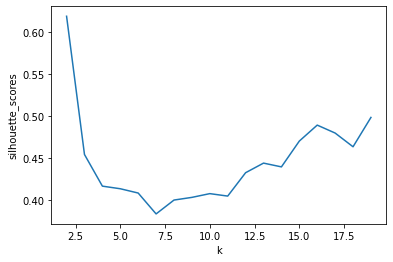

In [22]:
plt.plot(range(2,20), silhouette_scores)
plt.xlabel('k')
plt.ylabel('silhouette_scores')
plt.show()

Mayor silhouette scores con K=2

In [23]:
inertias = [model.inertia_ for model in km_perk]
inertias

[35812.3682008368,
 11137.736723639344,
 7254.022835331666,
 5691.624714323989,
 4805.423332643921,
 4233.709967967664,
 3775.6560218914647,
 3312.184647309383,
 2984.567361368435,
 2841.8155485330253,
 2612.052327151954,
 2412.0829271157995,
 2268.5109140505783,
 2155.6868408166806,
 2029.3145660247746,
 1933.1812127609685,
 1849.0043778713687,
 1788.8727950596997,
 1695.3879260828548]

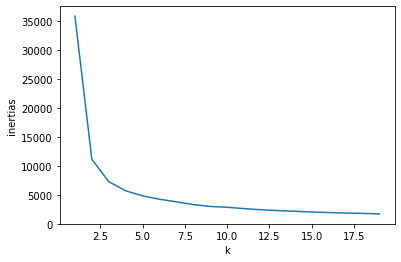

In [24]:
plt.plot(range(1,20),inertias)
plt.xlabel('k')
plt.ylabel('inertias')
plt.show()

Con el Elbow method comprobamos que k=2 sería la opción más adecuada

In [43]:
kmeans = KMeans(n_clusters=2, random_state=42).fit(df_model)
kmeans.labels_

array([0, 0, 1, ..., 0, 1, 0])

Muestra en un pie plot la distribución de los distintos clusters.

In [44]:
df_clusters = pd.DataFrame(kmeans.labels_, columns=['Cluster'])
df_clusters.head()

,Cluster
0,0
1,0
2,1
3,0
4,0


<AxesSubplot:ylabel='Cluster'>

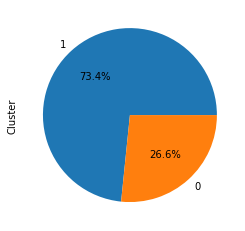

In [45]:
df_clusters['Cluster'].value_counts().plot.pie(autopct="%.1f%%")

In [46]:
df_model['cluster'] = kmeans.labels_

c:\Users\Miguel Angel\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [47]:
df_model.groupby('cluster').mean()

,rating,effectiveness_int,sideEffects_int
cluster,,,
0,2.678356,1.596131,2.475212
1,8.575877,3.421491,0.880263
